<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/02_NLP_implementation_approches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NLP Implementation Strategies

To implement NLP, various strategies are applied depending on the complexity of the task, the data available, and the level of precision required. Here are the main strategies for implementing NLP:

1. **Rule-Based Approach**: Use predefined linguistic rules for processing and analyzing language.
2. **Statistical Models**: Apply statistical methods and algorithms to learn patterns from data (e.g., Naive Bayes, HMM).
3. **Classical Machine Learning Models**: Use models like Support Vector Machines (SVMs), Decision Trees, or Logistic Regression for text classification.
4. **Deep Learning Models**: Utilize neural networks, including RNNs, LSTMs, and transformers, for more complex NLP tasks like language modeling, translation, and summarization.
5. **Pretrained Language Models**: Use models such as BERT, GPT, or T5 that have been pre-trained on large corpora and fine-tuned on specific tasks.
6. **Transfer Learning**: Fine-tune models that have been pre-trained on large datasets for domain-specific tasks.
7. **Hybrid Approaches**: Combine rule-based methods with machine learning or deep learning models to create more efficient NLP systems.




### **Approaches to NLP: Classic vs. Deep Learning-Based**



#### 1. **Classic NLP Approach: NLTK**

- **NLTK (Natural Language Toolkit)** is one of the most widely used libraries for classical NLP tasks.
- It provides tools for linguistic data analysis and various methods to perform traditional text processing.
- Classic NLP relies on **rule-based systems** and **statistical techniques** to understand and manipulate language data.



##### Key Features of NLTK:
- **Tokenization**: Breaking down a sentence into words or a paragraph into sentences.
- **Stemming/Lemmatization**: Reducing words to their base or root form (e.g., "running" to "run").
- **Part-of-Speech Tagging (POS)**: Assigning grammatical categories (nouns, verbs, adjectives) to each word in a sentence.
- **Named Entity Recognition (NER)**: Identifying entities like names of people, organizations, locations, etc.
- **Parsing**: Breaking down sentences into syntactic structures using techniques like **constituency parsing** or **dependency parsing**.
- **Text Classification**: Using classical machine learning models like Naive Bayes or SVM for tasks such as sentiment analysis, spam detection, etc.
- **Statistical Language Models**: Calculating probabilities of word sequences and used in applications like speech recognition.



##### Advantages of Classic NLP:
- **Simplicity**: Easy to understand and implement, especially for small datasets or well-defined problems.
- **Interpretable**: Rule-based systems are highly interpretable and easy to tweak for specific tasks.
- **Efficiency**: Classic approaches can be computationally cheaper and more lightweight, making them ideal for smaller tasks and datasets.



##### Limitations of Classic NLP:
- **Lack of Contextual Understanding**: These approaches fail to capture deep semantic and contextual relationships between words.
- **High Reliance on Rules**: Writing rules for every possible scenario in a language is not scalable, especially with ambiguous or complex language use cases.
- **Limited Generalization**: Classical approaches struggle with understanding nuances like sarcasm, multiple meanings of words (polysemy), and context shifts.



##### Example Workflow in NLTK:
Here’s a simple workflow for text processing using NLTK:
```python
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenization
text = "NLP is fascinating!"
tokens = word_tokenize(text)

# Part-of-Speech Tagging
pos_tags = pos_tag(tokens)
print(pos_tags)
```

This would output:
```plaintext
[('NLP', 'NNP'), ('is', 'VBZ'), ('fascinating', 'JJ'), ('!', '.')]
```



#### 2. **Deep Learning-Based NLP Approach: PyTorch**

- Deep learning has revolutionized NLP by introducing models that can handle the complexities of language more effectively than classical approaches.
- **PyTorch**, a deep learning framework, is widely used for building deep learning models for NLP. Unlike classical methods, deep learning can **learn features directly from the data** without requiring explicit human-designed rules.



##### Key Features of PyTorch for NLP:
- **Word Embeddings**: PyTorch provides easy integration with pretrained word embeddings like **Word2Vec**, **GloVe**, and **FastText**. These embeddings capture semantic relationships between words based on their context.
- **Recurrent Neural Networks (RNN)**: RNNs are suitable for sequential data (like text), where each word depends on previous words. PyTorch allows easy implementation of RNNs and their variants like **LSTMs** and **GRUs**.
- **Transformers**: PyTorch is used to build **Transformer-based models** like **BERT**, **GPT**, and **T5**, which use attention mechanisms to capture long-range dependencies in text.
- **Transfer Learning**: Pre-trained models like BERT and GPT can be fine-tuned for specific NLP tasks, drastically reducing the need for large task-specific datasets.
- **Attention Mechanisms**: PyTorch allows the implementation of attention mechanisms to focus on important parts of the input sequence.



##### Advantages of Deep Learning-Based NLP:
- **Contextual Understanding**: Deep learning models can learn relationships between words in the context of a sentence, improving understanding of nuances like polysemy or word order.
- **Scalability**: These models scale well with larger datasets, improving performance as more data is available.
- **Generalization**: Models like transformers generalize well across different NLP tasks due to their ability to learn rich language representations.
- **End-to-End Learning**: No need for manual feature engineering—deep learning models automatically learn features from the data.



##### Limitations of Deep Learning-Based NLP:
- **Data Hungry**: These models require large amounts of labeled data to perform well, which can be a limitation in specific domains.
- **Computational Resources**: Training deep learning models is computationally expensive and often requires GPUs for efficiency.
- **Interpretability**: Deep learning models, particularly transformer-based models, can be seen as "black boxes," making it difficult to understand their decision-making process.



##### Example Workflow in PyTorch:
Here’s a basic workflow for building an LSTM-based text classifier in PyTorch:

```python
import torch
import torch.nn as nn
import torch.optim as optim

# Define the LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial hidden state
        c_0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Get output from the last time step
        return out

# Hyperparameters
input_size = 100  # Word embedding size
hidden_size = 128
output_size = 2  # Binary classification (positive/negative)
num_layers = 2
learning_rate = 0.001

# Initialize and train the model
model = LSTMClassifier(input_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Example training loop (dummy data)
for epoch in range(10):
    # Dummy input: (batch_size, sequence_length, input_size)
    inputs = torch.randn(32, 10, input_size)
    labels = torch.randint(0, 2, (32,))
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')
```



##### Transformer-Based Models in PyTorch:
PyTorch, combined with **Hugging Face's Transformers library**, enables easy implementation of advanced models like BERT and GPT.

```python
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize input text
inputs = tokenizer("NLP with deep learning is amazing!", return_tensors="pt")

# Forward pass
outputs = model(**inputs)
logits = outputs.logits
```

---



### Comparison between NLTK vs PyTorch

#### 1. Data Requirements


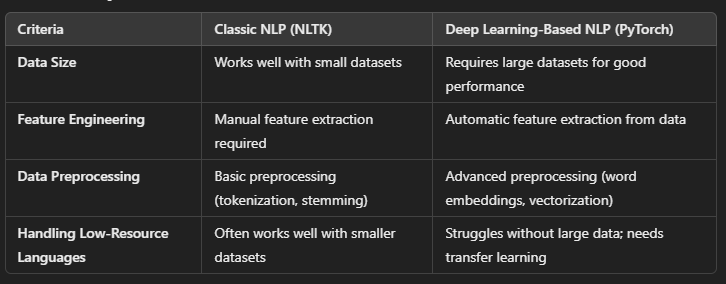

#### 2. Interpretability and Transparency


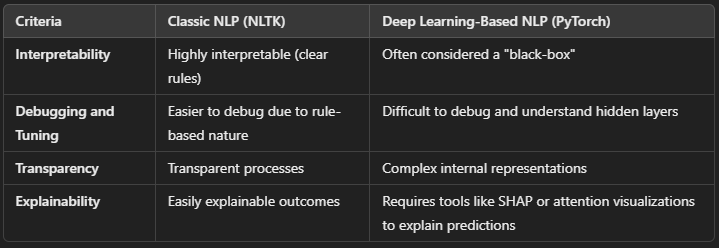

#### 3. Handling Context and Semantics


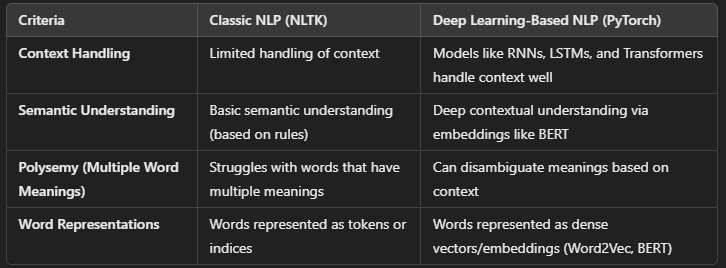

#### 4. Performance and Scalability


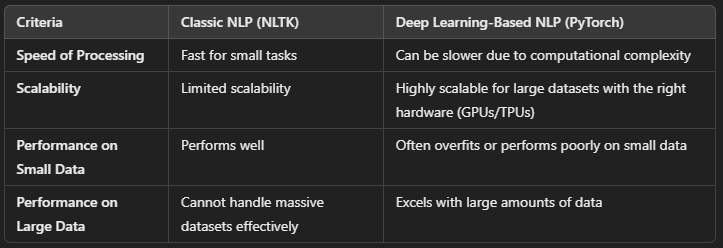

#### 5. Resource Requirements


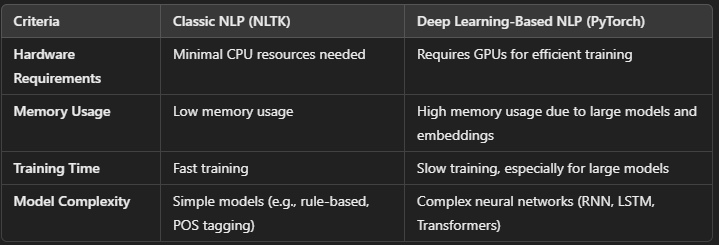

#### 6. Flexibility and Use Cases


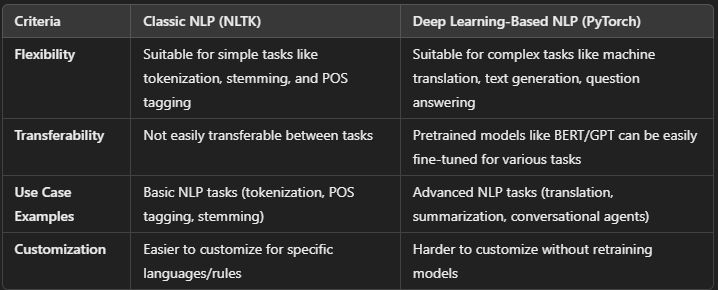

#### 7. Generalization and Adaptability


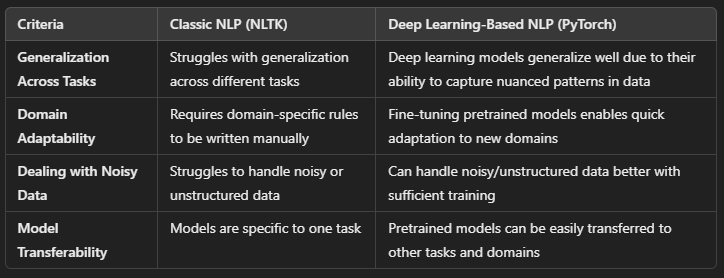

#### 8. Cost and Development Time


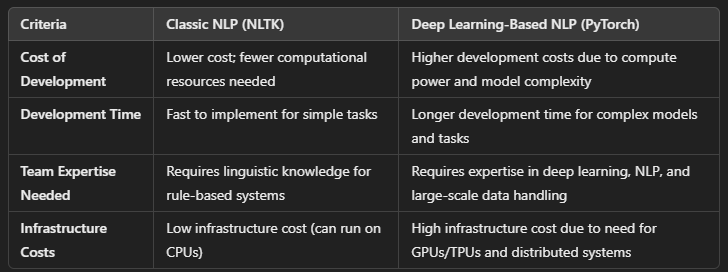